# Complexity

When writing programs, specially if one is dealing with a big amount of data, it is important to take care how fast the program runs. A small modification in an algorithm may bring execution time from hours to seconds. In computer science, the area that studies algorithm efficiency is called **complexity theory**. In this lecture, we learn how to reason about the efficiency of the programs we write.

Let's start with an example. Both functions below compute the sum of numbers from 1 to n.

In [1]:
def sum1(n):
    s = 0
    for i in range(n):
        s += (i+1)
    return s

def sum2(n):
    s = (n * (n + 1)) // 2
    return s

How fast do they run?

Since we can plot graphs now, let's plot the graph of how long it takes for each function to run, as a function of n.

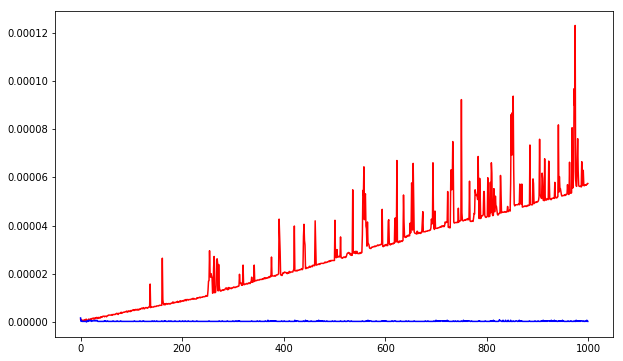

In [2]:
import time
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))

xs = []
ys = []
for i in range(1000):
    t0 = time.time()
    s = sum1(i)
    t1 = time.time()
    t = t1 - t0
    xs += [i]
    ys += [t]
    
plt.plot(xs, ys, 'r')

xs = []
ys = []
for i in range(1000):
    t0 = time.time()
    s = sum2(i)
    t1 = time.time()
    t = t1 - t0
    xs += [i]
    ys += [t]
    
plt.plot(xs, ys, 'b')

plt.show()

If you needed a fast function for adding numbers from 1 to n, which one would you choose? It is clear that `sum2` is better. That is because, as n grows, the *running time* of `sum2` remains more or less constant, while the running time of `sum1` grows as n grows.

In practice, we are not worried exactly about how fast the code runs for a particular input, but **how much slower it gets as the input grows**. 

Ideally, we would all like to have code that behaves as `sum2`, i.e., the running time is more or less constant regardless of the input size. But more often than not, algorithms take longer to run as the input grows. It is important to be able to understand how the input size affects our code, and we don't have to plot graphs to do that each time. Instead, we perform the **complexity analysis** of the code.

## Complexity analysis

There are two important parts of a complexity analysis: *computing the number of steps* and *deciding what is the input size*.

### Computation steps

The efficiency of a program is measured by counting the number of steps it takes to reach a solution. Each atomic computation operation counts as one step. These include:

- Assignment (e.g. `L = []`)
- Arithmetic operations (e.g. `x + y`)
- Boolean comparisons (e.g. `c == 't'`)
- Indexing (e.g. `L[i]`)

What are the number of steps `sum1` and `sum2` take for n = 5?

In [3]:
def sum1_steps(n):
    s = 0
    steps = 1
    for i in range(n):
        s += (i+1)
        steps += 3
    print("n:", n, " steps:", steps)
    return s

def sum2_steps(n):
    s = (n * (n + 1)) // 2
    steps = 4
    print("n:", n, " steps:", steps)
    return s

sum1_steps(5)
sum2_steps(5)

n: 5  steps: 16
n: 5  steps: 4


15

### Input size

Since we want to analyse how our program behaves as the input grows, we need to decide on **what it is about the input that affects the number of steps**. 

For the `sum1` function, the larger n is, the more times the loop is run, which incurs on 3 extra steps. So the actual value n is a good input measure. The number of steps can be computed by f(n) = 3*n + 1.

For the `sum2` function, no matter how large n is, it will take the same amount of time. So this function is independent of input. Another way of seeing this is: regardless of the input size we choose, the function takes constant time. The number of steps is f(n) = 4.

Sometimes, more than one input size will affect how the code runs, and that's ok. That simply means that the number of steps will be a function of two values.

Take the function `myCount` below. What would you use as the input size?

In [4]:
def myCount(e, L):
    c = 0
    for x in L:
        if x == e:
            c += 1
    return c

The number of steps this function takes will depend on the number of times the loop runs, which, in turn, depends on the number of elements in `L`. A reasonable input size then is the *number of elements in L*. Note that the input `e` does not play a role on the number of steps, and so we can safely ignore it for the input measure.

What about the `isIn` function? What would be its input size?

In [5]:
def isIn(e, L):
    for x in L:
        if e == x:
            return True
    return False

You might have noticed that there is something different about the `isIn` function. The number of steps it will take not only depends on the number of elements in the list `L` but on *where* element `e` is in `L` (if anywhere). Taking this kind of details into account will quickly become too overwhelming or specific. Think, for example, on sorting algorithms. Depending on the algorithm, the number of steps it performs depends on how many elements are out of order.

That is why, when it comes to complexity analysis, we will only be worried about the **worst case scenario:** there one in which the function will take the most amount of steps. By being as pessimistic as possible, we are safe that the program will not take longer to run, and if it runs faster, all the better.

Finding the balance of what we can abstract away and what needs to be taken into account might sound complicated. It helps sometimes to think of the extremes. On one end, we are overly worried about the exact number of steps. and this will depend on all sorts of details of the input, which will get out of hand and too complicated to handle. On the other hand, we abstract away too many details, and just choose a ridiculous amount of steps as our upper bound. Certainly the program will take fewer than that, but this is not at all informative of the running time. (If I tell you your final grades will be out by December this year, it is a true statement, but not really helpful.)

Fow our `isIn` function above, the worst case is when `e` is not in `L` at all. In which case it runs through all iterations of the loop, without ending prematurely. And what determines how many times the loop runs is the length of `L`, so that is the input size used for complexity analysis.

## Big-O notation

There is yet one more abstraction we can make. We are interested in how much the running time grows as the input increases. If we plot the graph for running time, this measure is represented by how *steep* this curve is. Suppose we have measures of steps for two functions:

f(n) = 2*n + 10

g(n) = n + 1000

Which one is worse? Which one has a faster growth rate as n increases? Let's plot them and see.

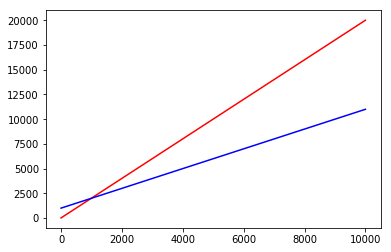

In [6]:
xs = []
ys = []
for n in range(10000):
    xs += [n]
    y = 2*n + 10
    ys += [y]
    
plt.plot(xs,ys,'r')

xs = []
ys = []
for n in range(10000):
    xs += [n]
    y = n + 1000
    ys += [y]
    
plt.plot(xs,ys,'b')

plt.show()

Even though function f grows more, they are both *linear* functions. That means that runtime will increase linearly with n. In other words, if n increased by 10, the runtime will increase by a factor of 10, regardless of whether this increase was from 10 to 20 or from 500 to 510. That's a good thing about linear functions, they don't grow too fast.

However, see what happens when we compare f with the function h:

h(n) = n$^2$ + 2

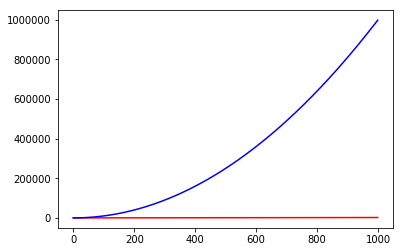

In [7]:
xs = []
ys = []
for n in range(1000):
    xs += [n]
    y = 2*n + 10
    ys += [y]
    
plt.plot(xs,ys,'r')

xs = []
ys = []
for n in range(1000):
    xs += [n]
    y = n*n + 2
    ys += [y]
    
plt.plot(xs,ys,'b')

plt.show()

Surprisingly, function h grows so fast, that f looks like a constant function (although we know it is not!).

That is because h is a *quadratic* function. Differently from a linear function, increasing the input size from 500 to 510 will cause a much much higher increase in runtime than increasing the input size from 10 to 20.

When analysing program complexity, we are only worried on how fast running time grows with the growth of input, so the important part of all of those functions is the *dominating factor*.

The big-O notation describes functions' asymptotic behavior (i.e. its dominating factor, or how fast it grows, or how steep its curve it). For the functions above, we say that f is $O(n)$, and h is $O(n^2)$ (read "big oh of n squared" -- or quadratic). Typically, the complexity of algorithms will fall in one of these common complexities (in decreasing speed):

- $O(1)$: constant (e.g. if $f(n) = 4$ then $f$ is $O(1)$). This is the fastest you can get.
- $O(\log n)$: logarithmic
- $O(\sqrt{n})$: square root
- $O(n)$: linear (e.g. if $f(n) = 10n + 2$ then $f$ is $O(n)$). This is generally still considered good.
- $O(n \log n)$: linearithmic, loglinear or quasilinear
- $O(n^2)$: quadratic
- $O(n^3)$: cubic
- $O(n^k)$: polynomial
- $O(k^n)$: exponential (e.g. if $f(n) = 2^{4n}$ then $f$ is $O(2^n)$). This is generally considered slow (although we \emph{can} get much worse!).
- $O(n!)$: factorial. Algorithms falling in this category cannot usually be used in practice for really big $n$.

By comparing the asymptotic behavior of two programs, we can identify which one behaves best when the input size is increased. The following graph gives us an idea of how different functions compare:

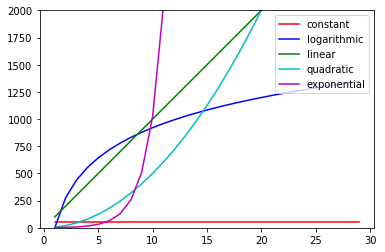

In [8]:
import math

xs = []
ys = []
for n in range(1,30):
    xs += [n]
    y = 50
    ys += [y]
    
plt.plot(xs, ys, 'r', label='constant')

xs = []
ys = []
for n in range(1,30):
    xs += [n]
    y = 400*math.log(n)
    ys += [y]
    
plt.plot(xs, ys, 'b', label='logarithmic')

xs = []
ys = []
for n in range(1,30):
    xs += [n]
    y = 100*n
    ys += [y]
    
plt.plot(xs, ys, 'g', label='linear')

xs = []
ys = []
for n in range(1,30):
    xs += [n]
    y = 5*n*n
    ys += [y]
    
plt.plot(xs, ys, 'c', label='quadratic')

xs = []
ys = []
for n in range(1,30):
    xs += [n]
    y = math.pow(2,n)
    ys += [y]
    
plt.plot(xs, ys, 'm', label='exponential')

plt.legend(loc="upper right")
plt.ylim((0,2000))
plt.show()

## Built-in functions

We can consider "native" operations to take a constant amount of time, but most of the *built-in* python functions will have a complexity greater than constant. Take for example the `count` function.

The two codes below count the number of occurrences of elements in a list `L` and returns this information in a dictionary. Although both seem "linear" (one loop over `L`), `count1` has some hidden work in the call to the `count` function. See how their runtime graphs behave.

In [9]:
def count1(L):
    d = {}
    for e in L:
        c = L.count(e)
        d[e] = c
    return d
        
def count2(L):
    d = {}
    for e in L:
        if e in d:
            d[e] += 1
        else:
            d[e] = 1
    return d

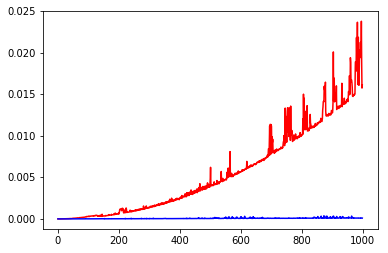

In [10]:
import random

def genList(n):
    L = []
    for i in range(n):
        x = random.randint(1,1000)
        L += [x]
    return L

xs = []
ys = []
for i in range(1000):
    L = genList(i)
    t0 = time.time()
    s = count1(L)
    t1 = time.time()
    t = t1 - t0
    xs += [i]
    ys += [t]
    
plt.plot(xs, ys, 'r')

xs = []
ys = []
for i in range(1000):
    L = genList(i)
    t0 = time.time()
    s = count2(L)
    t1 = time.time()
    t = t1 - t0
    xs += [i]
    ys += [t]
    
plt.plot(xs, ys, 'b')

plt.show()
    

It turns out `count1` is actually *quadratic*. That is because of the `for` loop with `count` inside. `count` executes linearly on the size of the list, so what we have is:

```
# n is len(L)
for e in L:        # runs at most n times
    c = L.count(e) # runtime linear with respect to n, so takes a*n + b steps for some a and b
    d[e] = c
```

That means the inner count will take $a*n + b$ steps, and that will run $n$ times (because of the outer loop). So this piece of code runs in $n*(a*n + b) = a*n*n + b*n \in O(n^2)$.

It is the same if we unfold the `count` function into its actual code, instead of calling it:

```
# n is len(L)
for e in L:        # runs at most n times
    c = 0
    for x in L:    # runs at most n times
        if x == e:
            c += 1
    d[e] = c
```

This code also runs in $O(n^2)$.

**Remark:** The python built-in `in` command on lists and strings runs in linear time as well. If it is used for dictionaries, it runs in constant time.

Suppose the nested loops were such that the lists had different sizes:

In [11]:
def countFrom(L1, L2):
    d = {}
    for e1 in L1:
        c = 0
        for e2 in L2:
            if e2 == e1:
                c += 1
        d[e1] = c
    return d

Assume that $n$ is the length of `L1` and $m$ is the length of `L2`. Then, the outer loop runs $n$ times, and, for each of them, the inner loop runs $m$ times. That gives us a complexity of $O(n*m)$.

If the loops were running one after the other, then we have a different situation:

In [12]:
def countBoth(L1, L2):
    d = {}
    
    for e in L1:
        if e in d:
            d[e] += 1
        else:
            d[e] = 1
    
    for e in L2:
        if e in d:
            d[e] += 1
        else:
            d[e] = 1
            
    return d

In that case, the first loop will run $n$ times, and once it is done the second loop starts and runs $m$ times. In that case, the complexity class is $O(n+m)$.